In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def organise_data(strain_rates, temps):
    ref_strain = '0.0001'
    ref_stress = 580.2822
    for temp in temps:
        # Initialize DataFrame with strain column for the current temperature
        df = None  # Initialize df to None to handle it dynamically for each temperature
        
        for strain_rate in strain_rates:
            # Load stress data for the current temperature and strain rate
            data_RD = pd.read_csv(f'../extended_curve/Tmp{temp}K_StrRt{strain_rate}_RD.csv')
            
            if df is None:
                # Initialize DataFrame with strain column if not already done
                df = pd.DataFrame({'strain': data_RD['Strain']})
            
            # Add stress data for the current strain rate as a new column
            df[f'StrRt{strain_rate}'] = data_RD['Stress']

        for strain_rate in strain_rates:
            # Add stress data for the current strain rate as a new column
            df[f'ref_StrRt{strain_rate}'] = df[f'StrRt{strain_rate}']/ref_stress

        # Filter the DataFrame for strain values below 0.08
        df = df[df['strain'] < 0.08]
        
        # Save the DataFrame to a CSV file for the current temperature
        output_file_path = f"Tmp{temp}_RD_fixed.csv"
        df.to_csv(output_file_path, index=False)

In [4]:
def organise_data(strain_rates, temps):
    ref_strain = '0.0001'
    for temp in temps:
        # Initialize DataFrame with strain column for the current temperature
        df = None  # Initialize df to None to handle it dynamically for each temperature
        
        for strain_rate in strain_rates:
            # Load stress data for the current temperature and strain rate
            data_RD = pd.read_csv(f'../extended_curve/Tmp{temp}K_StrRt{strain_rate}_RD.csv')
            data = pd.read_csv(f'../extended_curve/Tmp298.15K_StrRt0.0001_RD.csv')
            
            if df is None:
                # Initialize DataFrame with strain column if not already done
                df = pd.DataFrame({'strain': data_RD['Strain']})
            
            # Add stress data for the current strain rate as a new column
            df[f'StrRt{strain_rate}'] = data_RD['Stress']

        for strain_rate in strain_rates:
            # Add stress data for the current strain rate as a new column
            df[f'ref_StrRt{strain_rate}'] = df[f'StrRt{strain_rate}']/data['Stress']

        # Filter the DataFrame for strain values below 0.08
        df = df[df['strain'] < 3]
        
        # Save the DataFrame to a CSV file for the current temperature
        output_file_path = f"Tmp{temp}_RD.csv"
        df.to_csv(output_file_path, index=False)

In [5]:
#First set, not necessary
strain_rates = [0.0001]
temps = ['77.15', '233.15']
organise_data(strain_rates, temps)

#Second set
strain_rates = [0.0001, 0.001, 0.01, 0.1]
temps = ['373.15', '473.15', '573.15', '673.15']
organise_data(strain_rates, temps)

#Third set
strain_rates = [0.0001, 0.001, 0.01, 0.1,1]
temps = ['298.15']
organise_data(strain_rates, temps)

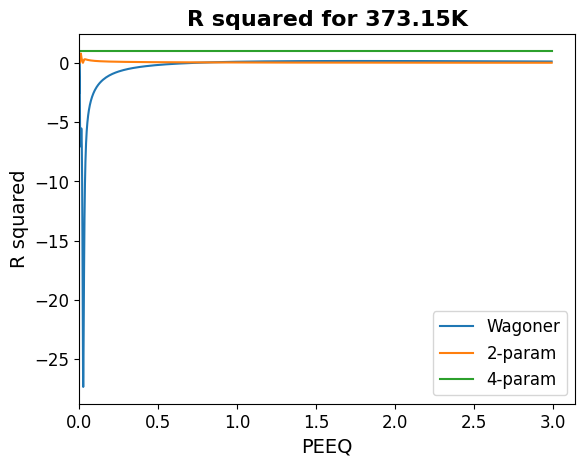

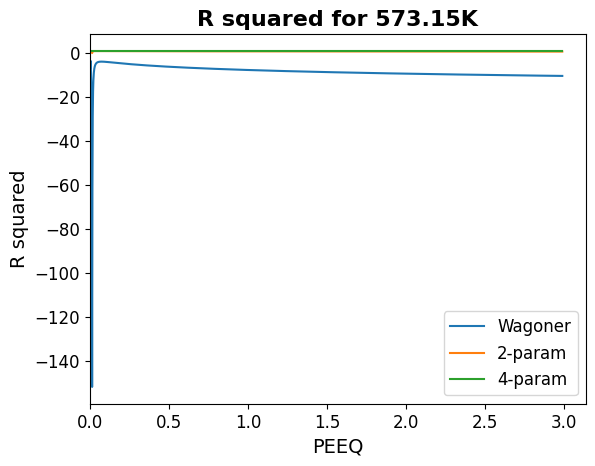

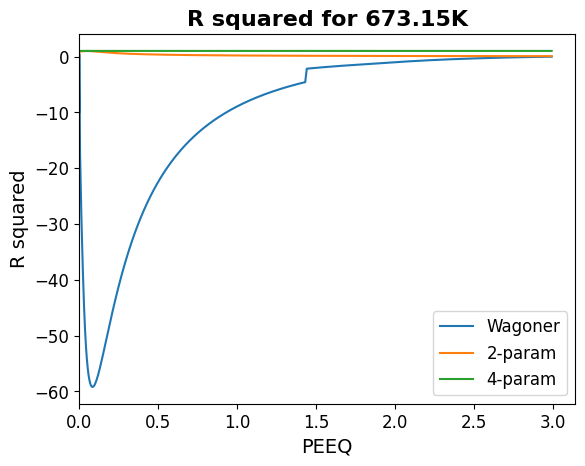

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

temps = ['373.15', '573.15', '673.15']
for temp in temps:
    w = pd.read_csv(f'wagoner/w_m_values_{temp}.csv')
    s1 = pd.read_csv(f'student/Parameters_Tmp{temp}_RD.csv')
    s2 = pd.read_csv(f'student2/Parameters_Tmp{temp}_RD_new.csv')

    strain = w['PEEQ']
    plt.plot(strain, w['R_squared'], label='Wagoner')
    plt.plot(strain, s1['R_squared'], label='2-param')
    plt.plot(strain, s2['R_squared'], label='4-param')
    plt.xlabel('PEEQ', fontsize=14)
    plt.ylabel('R squared', fontsize=14)
    plt.title(f'R squared for {temp}K', fontsize=16, fontweight='bold')
    plt.xlim(left=min(strain))
    plt.legend(loc='lower right', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()
